<a href="https://colab.research.google.com/github/Shrawanthi06/ML_Projects/blob/main/Case_Study_PPI%2BNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving networks.csv to networks.csv


In [ ]:
df=pd.read_csv('networks.csv')

In [ ]:
print(f'Number of NaN values in the dataset: {df.isna().sum().sum()}')
le = LabelEncoder()
df['protein1'] = le.fit_transform(df['protein1'])
df['protein2'] = le.fit_transform(df['protein2'])
X = df.drop('label', axis=1)
y = df['label']


Number of NaN values in the dataset: 0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
logistic_regression = LogisticRegression(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
svm = SVC(kernel='linear', probability=True, random_state=42)

logistic_regression.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_svm = svm.predict(X_test)
def evaluate_model(y_test, y_pred, model_name):
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")


evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_svm, "Support Vector Machine")
feature_importances = random_forest.feature_importances_
feature_names = X.columns
print("Feature Importances from Random Forest:")
for name, importance in zip(feature_names, feature_importances):
    print(f"{name}: {importance:.2f}")


Evaluation Metrics for Logistic Regression:
Accuracy: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Confusion Matrix:
[[0 1]
 [1 0]]


Evaluation Metrics for Random Forest:
Accuracy: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Confusion Matrix:
[[0 1]
 [1 0]]


Evaluation Metrics for Support Vector Machine:
Accuracy: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Confusion Matrix:
[[0 1]
 [1 0]]


Feature Importances from Random Forest:
protein1: 0.52
protein2: 0.48


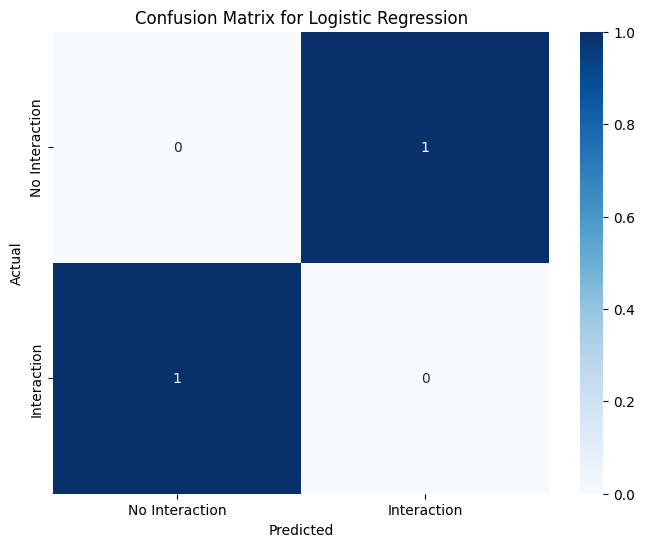

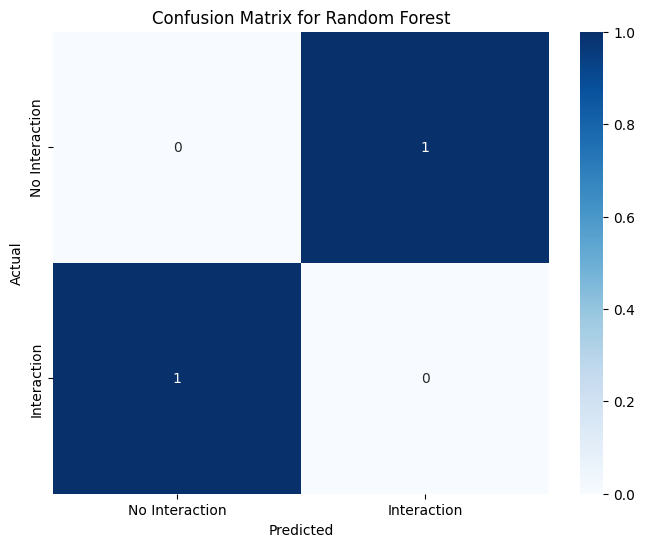

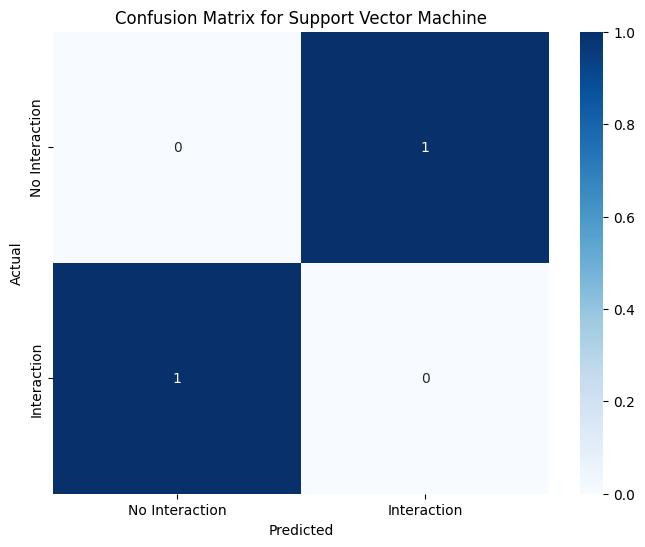

In [ ]:
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Interaction', 'Interaction'], yticklabels=['No Interaction', 'Interaction'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_svm, "Support Vector Machine")

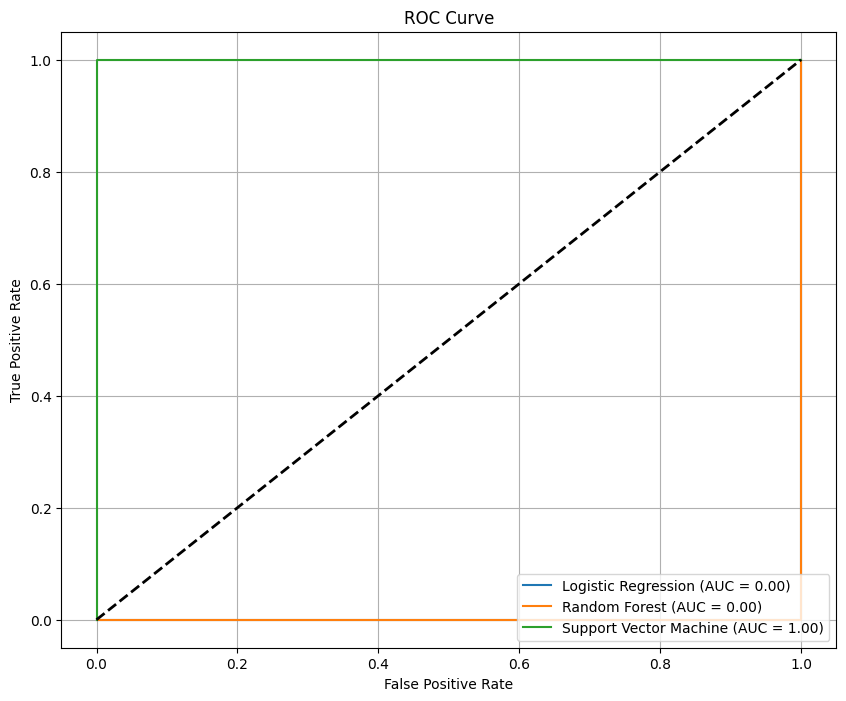

In [ ]:
plt.figure(figsize=(10, 8))
for model, y_pred_prob, name in zip(
    [logistic_regression, random_forest, svm],
    [logistic_regression.predict_proba(X_test)[:, 1], random_forest.predict_proba(X_test)[:, 1], svm.predict_proba(X_test)[:, 1]],
    ["Logistic Regression", "Random Forest", "Support Vector Machine"]):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

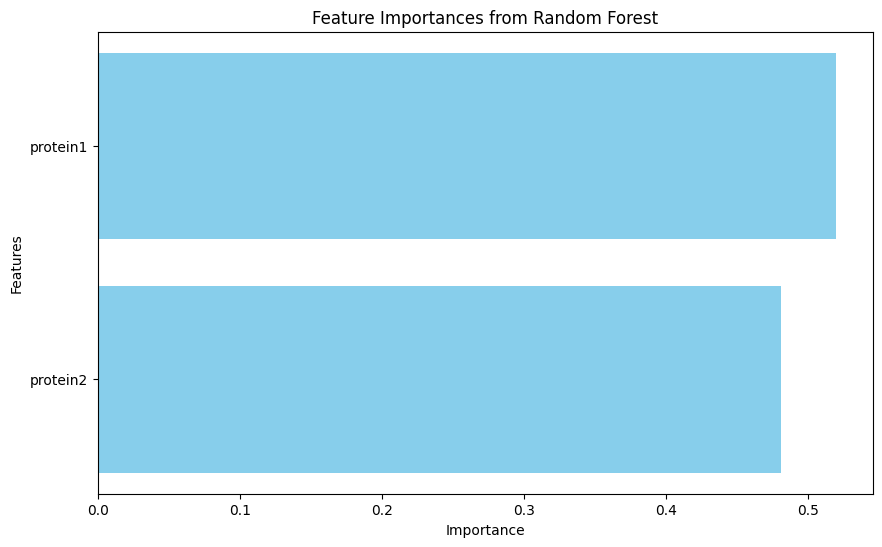

In [ ]:
plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importances = feature_importances[sorted_idx]
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()